#                                                                            ЛАБОРАТОРНАЯ РАБОТА № 3

Ян Цзяфэн    P3223 

Исходные данные: 2_f_1.csv

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import math
import statsmodels.api as sm
from statsmodels.tsa import stattools
from scipy.interpolate import spline

In [4]:
df = pd.read_csv('2_f_1.csv', header=None, names=['value'])

In [5]:
print(df.head())

   value
0    958
1    978
2   1020
3   1062
4   1081


1. По заданному массиву кардиоинтервалов рассчитать основные параметры вариабельности: среднее значение M, среднеквадратическое отклонение SDNN,  коэффициент вариации CV. 

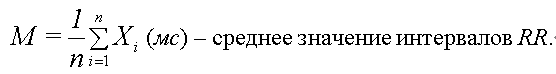

In [6]:
M = df.value.mean()
print("M =", M)

M = 970.3266666666667


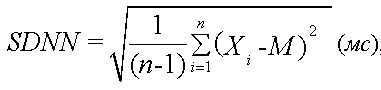
– это суммарный показатель вариабельности величин интервалов RR за весь рассматриваемый период, отражающий суммарный эффект вегетативной регуляции кровообращения

In [7]:
SDNN = df.value.std(ddof=1)
print("SDNN =", SDNN)

SDNN = 52.3483951087049


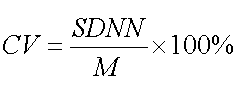
	- коэффициент вариации CV полного массива кардиоинтервалов представляет собой нормированную оценку SDNN:

In [8]:
CV = "%.2f%%" % (SDNN / M * 100)
print("CV =", CV)

CV = 5.39%


4. Определить вариационный размах MxDMn：

    Мx – максимальное значение, Mn – минимальное значение,   MxDMn– вариационный размах. 
    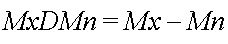

In [9]:
Mx = df.value.max()
Mn = df.value.min()
MxDMn = Mx - Mn
print("максимальное значение Mx =", Mx)
print("минимальное значение Mn =", Mn)
print("вариационный размах MxDMn =", MxDMn)

максимальное значение Mx = 1109
минимальное значение Mn = 850
вариационный размах MxDMn = 259


2. По заданному массиву кардиоинтервалов построить гистограмму с шагом 50 мс (0.05 с) по следующему алгоритму:
        a. динамический ряд кардиоинтервалов разбивается на k интервалов длиной Dx = 50 мс;
        b. вычисляется, сколько значений кардиоинтервалов xi попало в каждый из интервалов;
        c. частота попадания в какой-либо интервал получается делением числа попаданий на общее число кардиоинтервалов n;
        d. над каждым из интервалов разбиения строится прямоугольник, высота каждого прямоугольника равна частоте, деленной на Δx;
        e. полученную ступенчатую линию называют гистограммой.

Total n = 300
Amount x(850,900) = 28
Frequency x(850,900) = 0.0933
High x(850,900) = 0.0019
Amount x(900,950) = 75
Frequency x(900,950) = 0.2500
High x(900,950) = 0.0050
Amount x(950,1000) = 106
Frequency x(950,1000) = 0.3533
High x(950,1000) = 0.0071
Amount x(1000,1050) = 73
Frequency x(1000,1050) = 0.2433
High x(1000,1050) = 0.0049
Amount x(1050,1100) = 17
Frequency x(1050,1100) = 0.0567
High x(1050,1100) = 0.0011
Amount x(1100,1150) = 1
Frequency x(1100,1150) = 0.0033
High x(1100,1150) = 0.0001


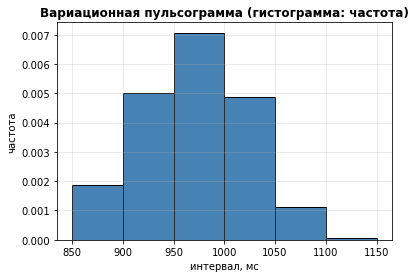

In [10]:
bins = math.ceil((Mx - Mn)/50)
temp = 0
Amount_xi = 0
n = df.value.count()
print("Total n =",n)
Frequency = []
High = []

for i in range(math.ceil(Mn/50)*50,math.ceil(Mx/50)*50,50):
    temp += Amount_xi
    Amount_xi = df.value[df.value < i+50].count() - temp
    print("Amount x(%d,%d) = %d"%(i,i+50,Amount_xi))
    Frequency_xi = round(Amount_xi/n,4)
    print("Frequency x(%d,%d) = %.4f"%(i,i+50,Frequency_xi))
    Frequency.append(Frequency_xi)
    High_xi = Frequency_xi/50
    High.append(High_xi)
    print("High x(%d,%d) = %.4f"%(i,i+50,High_xi))

prob,left,rectangle = plt.hist(x = df.value,
        bins = math.ceil((Mx - Mn)/50),
        rwidth = 50,
        range = (math.floor(Mn/50)*50,math.ceil(Mx/50)*50),
        histtype='bar',
        color = 'steelblue',
        edgecolor = 'black',
        density = True)
plt.ylabel('частота')
plt.xlabel('интервал, мс')
plt.xticks(range(Mn,Mx+50,50))
plt.grid(alpha=0.3)
plt.title('Вариационная пульсограмма (гистограмма: частота)',fontweight='bold')
plt.show()

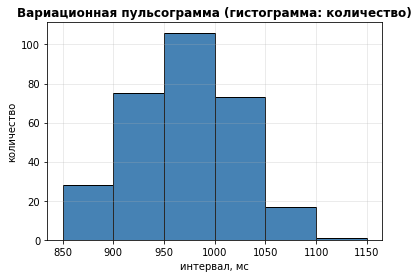

In [11]:
plt.close()
prob,left,rectangle = plt.hist(x = df.value,
        bins = math.ceil((Mx - Mn)/50),
        rwidth = 50,
        range = (math.floor(Mn/50)*50,math.ceil(Mx/50)*50),
        histtype='bar',
        color = 'steelblue',
        edgecolor = 'black')
plt.ylabel('количество')
plt.xlabel('интервал, мс')
plt.xticks(range(Mn,Mx+50,50))
plt.grid(alpha=0.3)
plt.title('Вариационная пульсограмма (гистограмма: количество)',fontweight='bold')
plt.show()

3.	По полученному графику определить амплитуду моды АMо, которая соответствует максимальному значению, и моду Mо – значение аргумента в точке максимума.

In [12]:
Mo = 950+50/2
AMo = round((df.value[df.value<1000].count()-df.value[df.value<950].count())/n*100,2)
print("мода Mo =",Mo)
print("амплитуда моды AMo = %.2f%%" % AMo)

мода Mo = 975.0
амплитуда моды AMo = 35.33%


5.	Рассчитать индекс напряжения регуляторных систем ИН.

In [13]:
SI = AMo/(2*Mo/1000*MxDMn/1000)
print("индекс напряжения регуляторных систем SI = %.2f%%" % SI)

индекс напряжения регуляторных систем SI = 69.95%


6.	По заданному массиву кардиоинтервалов построить график автокоррелограммы.

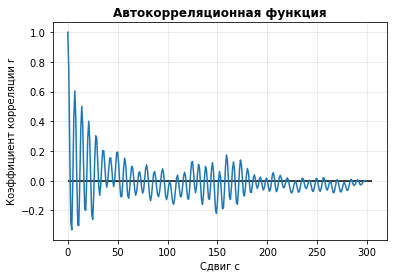

In [14]:
sdracf=stattools.acf(df.value, nlags=300)
plt.plot(sdracf)
plt.ylabel('Коэффициент корреляции r')
plt.xlabel('Сдвиг c')
plt.xticks(range(0,305,50))
plt.grid(alpha=0.3)
plt.title('Автокорреляционная функция',fontweight='bold')
plt.hlines(0,0,305,linestyle = '-')
plt.show()

7.	Рассчитать значение коэффициента корреляции после первого сдвига СС1 и число сдвигов до первого нулевого значения коэффициента корреляции СС0. 

In [15]:
CC1 = stattools.acf(df.value, nlags=300)[1]
print("CC1 =",CC1)
for i in range(300):
    CC_i = (stattools.acf(df.value, nlags=300)[i])
    CC_i_ = (stattools.acf(df.value, nlags=300)[i-1])
    if(CC_i_ >=0 and CC_i<=0):
        CC0 = i
        print("CC0 =",i)
        break

CC1 = 0.7407996546511376
CC0 = 3


8.	По заданному массиву кардиоинтервалов построить корреляционную ритмограмму.

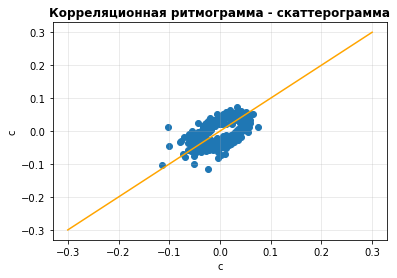

In [16]:
x = [df.value.loc[N-1]/1000-df.value.loc[N]/1000 for N in range(1,299)]
y = [df.value.loc[N]/1000-df.value.loc[N+1]/1000 for N in range(1,299)]
z = [-0.3,0.3]
plt.xlabel('c')
plt.ylabel('c')
plt.xticks(np.arange(-0.3,0.4,0.1))
plt.grid(alpha=0.3)
plt.plot(z,z,color = 'orange')
plt.scatter(x,y)
plt.title('Корреляционная ритмограмма - скаттерограмма',fontweight='bold')
plt.show()

Выводы по полученным результатам исследования:

    a.  В норме ИН колеблется в пределах 80-150 условных единиц. А здесь ИН чуть ниже нормы.
    b. В исследуемой выборке доминируют медленноволновые компоненты, потому что коэффициент корреляции после первого сдвига будет лишь незначительно ниже единицы.
    c. В скаттерограмме представляется эллипс, значит, что к дыхательной прибавлена некоторая величина недыхательной аритмии.